In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

mlcd = pd.read_csv('FineTuneCarData.csv')

In [2]:
mlcd.head()

,Unnamed: 0,name,brand,model,year,age,km_driven,torque_Nm,max_power_bhp,mileage_kmpl,selling_price,seller_type,owner,seats,engine,transmission,fuel,mileage,torque,dumpName
0,0,Audi A3 35 TDI Premium Plus,Audi,A3,2017,4,70000,320.00,143.00,20.38,2600000,Individual,First,5,1968 CC,Automatic,Diesel,20.38 kmpl,320Nm@ 1750-3000rpm,35 TDI Premium Plus
1,1,Audi A3 40 TFSI Premium,Audi,A3,2017,4,8000,250.00,177.50,16.60,1689999,Dealer,First,5,1798 CC,Automatic,Petrol,16.6 kmpl,250Nm@ 1250-5000rpm,40 TFSI Premium
2,2,Audi A3 35 TDI Premium Plus,Audi,A3,2018,3,20000,320.00,143.00,20.38,3000000,Individual,First,5,1968 CC,Automatic,Diesel,20.38 kmpl,320Nm@ 1750-3000rpm,35 TDI Premium Plus
3,3,Audi A4 1.8 TFSI,Audi,A4,2010,11,55000,215.75,163.20,12.30,730000,Individual,Second,5,1781 CC,Automatic,Petrol,12.3 kmpl,"22.9@ 1,950-4,700(kgm@ rpm)",1.8 TFSI
4,4,Audi A4 2.0 TDI 177 Bhp Premium Plus,Audi,A4,2013,8,110000,380.00,174.33,17.11,1200000,Individual,First,5,1968 CC,Automatic,Diesel,17.11 kmpl,380Nm@ 1750-2500rpm,2.0 TDI 177 Bhp Premium Plus


In [3]:
mlcd.drop('Unnamed: 0',axis=1, inplace=True)
mlcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7617 non-null   object 
 1   brand          7617 non-null   object 
 2   model          7617 non-null   object 
 3   year           7617 non-null   int64  
 4   age            7617 non-null   int64  
 5   km_driven      7617 non-null   int64  
 6   torque_Nm      7617 non-null   float64
 7   max_power_bhp  7617 non-null   float64
 8   mileage_kmpl   7617 non-null   float64
 9   selling_price  7617 non-null   int64  
 10  seller_type    7617 non-null   object 
 11  owner          7617 non-null   object 
 12  seats          7617 non-null   int64  
 13  engine         7617 non-null   object 
 14  transmission   7617 non-null   object 
 15  fuel           7617 non-null   object 
 16  mileage        7617 non-null   object 
 17  torque         7617 non-null   object 
 18  dumpName

In [4]:
print(mlcd['brand'].unique())

['Audi' 'BMW' 'Chevrolet' 'Datsun' 'Fiat' 'Ford' 'Honda' 'Hyundai' 'Jeep'
 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Nissan' 'Renault' 'Skoda' 'Tata'
 'Toyota' 'Volkswagen']


In [5]:
mlcd["brand_type"] = np.where(mlcd["brand"].str.contains('BMW|Audi|Jeep|Mercedes-Benz'), 2, 1)

In [6]:
mlcd.drop(['name','brand','model','dumpName','year','seats','engine','mileage','torque'], axis=1, inplace=True)

In [7]:
mlcd.columns

Index(['age', 'km_driven', 'torque_Nm', 'max_power_bhp', 'mileage_kmpl',
       'selling_price', 'seller_type', 'owner', 'transmission', 'fuel',
       'brand_type'],
      dtype='object')

In [8]:
mlcd= mlcd[['selling_price','age','km_driven','torque_Nm','max_power_bhp','mileage_kmpl',
            'brand_type','seller_type','owner','transmission','fuel']]

In [9]:
toCategory = ['brand_type']
mlcd[toCategory] = mlcd[toCategory].astype('category')

### here im getting dummies of column  #getting dummies is aplhabetical
#### brand_type had values (1=GenralCars, 2=HighendCars) -> drop_first=True will set dummy variable only for brand_type_2 to avoid dummy variable trap. for brand_type_1 the value will be automatically 0 to avoid dummy trap
#### seller_type had values (Dealer,Individual)
#### owner had values (First,Second,Third_or_Above)
#### transmission had values (Automatic,Manual)
#### fuel had values (Diesel,Gas,Petrol)

In [10]:
mlcd = pd.get_dummies(mlcd,columns=['brand_type','seller_type','owner','transmission','fuel'],prefix=['brand_type','seller','owner','transmission','fuel'],drop_first=True)

In [11]:
mlcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   selling_price         7617 non-null   int64  
 1   age                   7617 non-null   int64  
 2   km_driven             7617 non-null   int64  
 3   torque_Nm             7617 non-null   float64
 4   max_power_bhp         7617 non-null   float64
 5   mileage_kmpl          7617 non-null   float64
 6   brand_type_2          7617 non-null   uint8  
 7   seller_Individual     7617 non-null   uint8  
 8   owner_Second          7617 non-null   uint8  
 9   owner_Third_or_Above  7617 non-null   uint8  
 10  transmission_Manual   7617 non-null   uint8  
 11  fuel_Gas              7617 non-null   uint8  
 12  fuel_Petrol           7617 non-null   uint8  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 409.2 KB


In [12]:
mlcd.head()

,selling_price,age,km_driven,torque_Nm,max_power_bhp,mileage_kmpl,brand_type_2,seller_Individual,owner_Second,owner_Third_or_Above,transmission_Manual,fuel_Gas,fuel_Petrol
0,2600000,4,70000,320.00,143.00,20.38,1,1,0,0,0,0,0
1,1689999,4,8000,250.00,177.50,16.60,1,0,0,0,0,0,1
2,3000000,3,20000,320.00,143.00,20.38,1,1,0,0,0,0,0
3,730000,11,55000,215.75,163.20,12.30,1,1,1,0,0,0,1
4,1200000,8,110000,380.00,174.33,17.11,1,1,0,0,0,0,0


In [13]:
mlcd.columns

Index(['selling_price', 'age', 'km_driven', 'torque_Nm', 'max_power_bhp',
       'mileage_kmpl', 'brand_type_2', 'seller_Individual', 'owner_Second',
       'owner_Third_or_Above', 'transmission_Manual', 'fuel_Gas',
       'fuel_Petrol'],
      dtype='object')

### Commenting out whole view of dataframe

In [14]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# mlcd

In [15]:
mlcd.head()

,selling_price,age,km_driven,torque_Nm,max_power_bhp,mileage_kmpl,brand_type_2,seller_Individual,owner_Second,owner_Third_or_Above,transmission_Manual,fuel_Gas,fuel_Petrol
0,2600000,4,70000,320.00,143.00,20.38,1,1,0,0,0,0,0
1,1689999,4,8000,250.00,177.50,16.60,1,0,0,0,0,0,1
2,3000000,3,20000,320.00,143.00,20.38,1,1,0,0,0,0,0
3,730000,11,55000,215.75,163.20,12.30,1,1,1,0,0,0,1
4,1200000,8,110000,380.00,174.33,17.11,1,1,0,0,0,0,0


In [16]:
mlcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7617 entries, 0 to 7616
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   selling_price         7617 non-null   int64  
 1   age                   7617 non-null   int64  
 2   km_driven             7617 non-null   int64  
 3   torque_Nm             7617 non-null   float64
 4   max_power_bhp         7617 non-null   float64
 5   mileage_kmpl          7617 non-null   float64
 6   brand_type_2          7617 non-null   uint8  
 7   seller_Individual     7617 non-null   uint8  
 8   owner_Second          7617 non-null   uint8  
 9   owner_Third_or_Above  7617 non-null   uint8  
 10  transmission_Manual   7617 non-null   uint8  
 11  fuel_Gas              7617 non-null   uint8  
 12  fuel_Petrol           7617 non-null   uint8  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 409.2 KB


In [17]:
mlcd.to_csv('MachineLearningCarData.csv')

In [18]:
mlcd.corr()

,selling_price,age,km_driven,torque_Nm,max_power_bhp,mileage_kmpl,brand_type_2,seller_Individual,owner_Second,owner_Third_or_Above,transmission_Manual,fuel_Gas,fuel_Petrol
selling_price,1.00,-0.41,-0.19,0.43,0.69,-0.12,0.72,-0.33,-0.16,-0.14,-0.49,-0.05,-0.22
age,-0.41,1.00,0.41,-0.06,-0.19,-0.35,-0.11,0.22,0.31,0.34,0.21,0.01,0.03
km_driven,-0.19,0.41,1.00,0.12,0.02,-0.19,-0.10,0.18,0.20,0.17,0.16,0.01,-0.29
torque_Nm,0.43,-0.06,0.12,1.00,0.62,-0.22,0.33,-0.08,-0.02,0.01,-0.20,-0.09,-0.50
max_power_bhp,0.69,-0.19,0.02,0.62,1.00,-0.39,0.54,-0.22,-0.06,-0.05,-0.43,-0.10,-0.30
mileage_kmpl,-0.12,-0.35,-0.19,-0.22,-0.39,1.00,-0.13,-0.01,-0.11,-0.13,0.15,0.07,-0.10
brand_type_2,0.72,-0.11,-0.10,0.33,0.54,-0.13,1.00,-0.22,-0.05,-0.04,-0.43,-0.02,-0.12
seller_Individual,-0.33,0.22,0.18,-0.08,-0.22,-0.01,-0.22,1.00,0.15,0.13,0.32,0.04,-0.03
owner_Second,-0.16,0.31,0.20,-0.02,-0.06,-0.11,-0.05,0.15,1.00,-0.18,0.10,0.02,-0.06
owner_Third_or_Above,-0.14,0.34,0.17,0.01,-0.05,-0.13,-0.04,0.13,-0.18,1.00,0.07,0.01,0.01


## all below code is copied, diy tmw

In [19]:
# import seaborn as sns
# sns.pairplot(mlcd)

In [20]:
# import matplotlib.pyplot as plt
# corrmat = mlcd.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(30,30))
# #plot heat map
# g=sns.heatmap(mlcd[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
X=mlcd.iloc[:,1:]
y=mlcd.iloc[:,0]

In [22]:
X.head()

,age,km_driven,torque_Nm,max_power_bhp,mileage_kmpl,brand_type_2,seller_Individual,owner_Second,owner_Third_or_Above,transmission_Manual,fuel_Gas,fuel_Petrol
0,4,70000,320.00,143.00,20.38,1,1,0,0,0,0,0
1,4,8000,250.00,177.50,16.60,1,0,0,0,0,0,1
2,3,20000,320.00,143.00,20.38,1,1,0,0,0,0,0
3,11,55000,215.75,163.20,12.30,1,1,1,0,0,0,1
4,8,110000,380.00,174.33,17.11,1,1,0,0,0,0,0


In [23]:
y.head()

0    2600000
1    1689999
2    3000000
3     730000
4    1200000
Name: selling_price, dtype: int64

In [24]:
print(X.columns)

Index(['age', 'km_driven', 'torque_Nm', 'max_power_bhp', 'mileage_kmpl',
       'brand_type_2', 'seller_Individual', 'owner_Second',
       'owner_Third_or_Above', 'transmission_Manual', 'fuel_Gas',
       'fuel_Petrol'],
      dtype='object')


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[1.55170769e-01 3.77978122e-02 5.60055451e-02 1.37085796e-01
 1.68467533e-02 5.13569813e-01 3.95738018e-02 3.61840092e-03
 2.15239669e-03 2.46393968e-02 1.69248549e-04 1.33702672e-02]


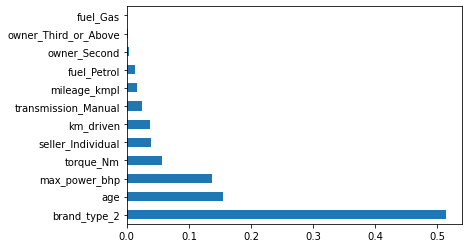

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=mlcd['brand_type_2'])

In [29]:
X_train.columns

Index(['age', 'km_driven', 'torque_Nm', 'max_power_bhp', 'mileage_kmpl',
       'brand_type_2', 'seller_Individual', 'owner_Second',
       'owner_Third_or_Above', 'transmission_Manual', 'fuel_Gas',
       'fuel_Petrol'],
      dtype='object')

In [30]:
# y_train.head()

In [31]:
# y_test.head()

In [32]:
# X_train[['age','brand_type_2','max_power_bhp','fuel_Petrol','transmission_Manual']].value_counts()

In [33]:
# X_test[['age','brand_type_2','max_power_bhp','fuel_Petrol','transmission_Manual']].value_counts()

In [34]:
X_train['brand_type_2'].value_counts()

0    5927
1     166
Name: brand_type_2, dtype: int64

In [35]:
X_train.groupby('brand_type_2').age.nunique()

brand_type_2
0    27
1    14
Name: age, dtype: int64

In [36]:
X_test.groupby('brand_type_2').age.nunique()

brand_type_2
0    23
1    10
Name: age, dtype: int64

In [37]:
X_test['brand_type_2'].value_counts()

0    1482
1      42
Name: brand_type_2, dtype: int64

In [38]:
# from sklearn.preprocessing import StandardScaler

In [39]:
# scaler = StandardScaler()

In [40]:
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

## Stratified shuffleSplit

In [41]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for train_index, test_index in split.split(mlcd, mlcd[['brand_type_2','fuel_Gas','fuel_Petrol','transmission_Manual']]):
#     strat_train_set = mlcd.loc[train_index]
#     strat_test_set = mlcd.loc[test_index]

In [42]:
# strat_train_set[['brand_type_2','fuel_Gas','fuel_Petrol','transmission_Manual']].value_counts()

In [43]:
# strat_test_set[['brand_type_2','fuel_Gas','fuel_Petrol','transmission_Manual']].value_counts()

In [44]:
# strat_test_set['fuel_Petrol'].value_counts()       ##for 1 column

In [45]:
corr_matrix = mlcd.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price           1.00
brand_type_2            0.72
max_power_bhp           0.69
torque_Nm               0.43
fuel_Gas               -0.05
mileage_kmpl           -0.12
owner_Third_or_Above   -0.14
owner_Second           -0.16
km_driven              -0.19
fuel_Petrol            -0.22
seller_Individual      -0.33
age                    -0.41
transmission_Manual    -0.49
Name: selling_price, dtype: float64

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
from sklearn.model_selection import RandomizedSearchCV

## first fine tuning

In [48]:
#Randomized Search CV                           
# {'n_estimators': 1000,                     
#  'min_samples_split': 2,                    
#  'min_samples_leaf': 1,                    
#  'max_features': 'sqrt',                     
#  'max_depth': 25}
# Model Performance                      
# Average Error: 61688.8913 Rupees.                   
# Accuracy = 85.31%  

# after stratifying
# Model Performance
# Average Error: 67447.0836 Rupees.
# Accuracy = 83.83%.

# #after standard scaling
# Model Performance
# Average Error: 66046.1776 Rupees.
# Accuracy = 84.62%.          
# Model Performance    for brand_type_2
# Average Error: 66112.9543 Rupees.
# Accuracy = 85.15%

# Average Error: 65731.7270 Rupees.
# Accuracy = 84.79%.            with all dummies


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 1350, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4]


### second fine tuning

In [49]:
# #Randomized Search CV finetuning the params

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1600, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(20, 30, num = 10)]
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 3, 4, 5, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 3, 4]


In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350], 'max_features': ['sqrt'], 'max_depth': [20, 22, 24, 26, 28, 30], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [52]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 7, verbose=2, random_state=66, n_jobs = 1)

### random grid

In [53]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)


# {'bootstrap': True,
#  'max_depth': 80,
#  'max_features': 3,
#  'min_samples_leaf': 3,
#  'min_samples_split': 8,
#  'n_estimators': 200}
# Model Performance
# Average Error: 70834.3204 Rupees.
# Accuracy = 83.16%.

In [54]:
rf_random.fit(X_train,y_train)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
[CV] n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  12.1s
[CV] n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV]  n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  12.1s
[CV] n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  12.5s
[CV] n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  12.2s
[CV] n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  13.0s
[CV] n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=950, min_samples_split=3, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  12.9s
[CV] n_estimators=950, min_samples_split=3, min_samp

[CV]  n_estimators=950, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=22, total=   9.4s
[CV] n_estimators=950, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=22 
[CV]  n_estimators=950, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=22, total=   9.0s
[CV] n_estimators=1350, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=26 
[CV]  n_estimators=1350, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=  16.4s
[CV] n_estimators=1350, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=26 
[CV]  n_estimators=1350, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=  14.8s
[CV] n_estimators=1350, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=26 
[CV]  n_estimators=1350, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   8.2s
[CV] n_estimators=1350, min_samples_split=4, m

[CV]  n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24, total=  11.9s
[CV] n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24 
[CV]  n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24, total=  11.4s
[CV] n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24 
[CV]  n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24, total=  11.4s
[CV] n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24 
[CV]  n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24, total=  11.5s
[CV] n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24 
[CV]  n_estimators=1050, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=24, total=  12.0s
[CV] n_estimators=1350, min_samples_split=5

[CV]  n_estimators=1200, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=28, total=  13.0s
[CV] n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28 
[CV]  n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28, total=  13.2s
[CV] n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28 
[CV]  n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28, total=  12.7s
[CV] n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28 
[CV]  n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28, total=  12.7s
[CV] n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28 
[CV]  n_estimators=1300, min_samples_split=4, min_samples_leaf=3, max_features=sqrt, max_depth=28, total=  13.0s
[CV] n_estimators=1300, min_samples_split=4

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 29.2min finished


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [20, 22, 24, 26, 28, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [800, 850, 900, 950,
                                                         1000, 1050, 1100, 1150,
                                                         1200, 1250, 1300,
                                                         1350]},
                   random_state=66, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 1300,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [56]:
rf_random.best_score_

-11534282797.281446

In [57]:
predictions=rf_random.predict(X_test)

In [58]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} Rupees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)



Model Performance
Average Error: 64598.5317 Rupees.
Accuracy = 84.78%.


In [59]:
list(predictions)

[793789.5227789099,
 154399.54053807384,
 509634.23566393,
 390382.57168260124,
 122913.33093541842,
 781473.7037851035,
 519066.9056391007,
 527603.4936305219,
 608763.366203791,
 764278.0276214896,
 568758.1885771853,
 364714.72328411264,
 96556.07206206734,
 513774.994621673,
 112119.56259345011,
 67324.8424729131,
 600048.6127181769,
 572536.4071854005,
 934250.0375214661,
 650721.8683167141,
 279980.0957548895,
 273128.50046898774,
 657704.4415634956,
 583509.5353624163,
 398742.0750889179,
 483695.8575650578,
 714845.1249003045,
 577365.7486069982,
 525430.7310128205,
 659131.4788551116,
 483157.69630104076,
 1641168.8154130038,
 486740.64689463604,
 788095.8776845919,
 717838.9432889848,
 589026.2064137777,
 372956.0381043757,
 960708.9891880343,
 155837.56532981852,
 733889.9101147788,
 1105643.2620926695,
 435406.9030115608,
 790572.7674391442,
 682575.4350042065,
 221052.38515996572,
 300379.52954582224,
 882112.0560728376,
 59504.01124725272,
 406625.16735470097,
 353498.209

In [60]:
y_test

4114     800000
1633     150000
4422     500000
2760     340000
5545     114999
         ...   
5913     275000
122     5500000
5002     600000
93      5400000
308       90000
Name: selling_price, Length: 1524, dtype: int64

In [61]:
X_test

,age,km_driven,torque_Nm,max_power_bhp,mileage_kmpl,brand_type_2,seller_Individual,owner_Second,owner_Third_or_Above,transmission_Manual,fuel_Gas,fuel_Petrol
4114,5,90000,200.00,88.50,24.30,0,1,0,0,1,0,0
1633,12,90000,96.10,62.10,17.92,0,1,0,0,1,0,1
4422,8,92000,200.00,88.76,20.77,0,1,0,1,1,0,0
2760,10,100000,180.00,63.00,13.60,0,1,1,0,1,0,0
5545,13,100000,84.00,67.00,18.90,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5913,8,80000,134.00,97.70,16.95,0,1,0,1,1,0,1
122,2,8500,400.00,190.00,16.78,1,0,0,0,0,0,0
5002,3,69779,113.00,81.80,22.00,0,0,0,0,0,0,1
93,2,7500,400.00,190.00,16.78,1,0,0,0,0,0,0


In [62]:
list(y_test-predictions)

[6210.477221090114,
 -4399.5405380738375,
 -9634.235663930012,
 -50382.571682601236,
 -7914.330935418417,
 -31473.703785103513,
 -19066.905639100703,
 -27603.49363052193,
 -8763.366203790996,
 65721.9723785104,
 21241.81142281473,
 -39714.72328411264,
 -6556.072062067338,
 236225.00537832698,
 37880.437406549885,
 -17324.842472913093,
 -48.612718176911585,
 -62537.40718540049,
 40749.96247853385,
 -155721.86831671407,
 5019.90424511052,
 -23128.50046898774,
 -2704.4415634955512,
 -33509.535362416296,
 -13742.075088917918,
 -33695.85756505781,
 -14845.12490030448,
 32634.25139300176,
 24569.2689871795,
 -209131.47885511164,
 -63157.69630104076,
 -316168.8154130038,
 13259.35310536396,
 -38095.87768459192,
 -117838.94328898482,
 110973.79358622234,
 -22956.038104375708,
 139291.01081196568,
 4162.434670181479,
 66110.08988522121,
 43356.737907330506,
 154593.0969884392,
 309427.2325608558,
 117424.56499579351,
 18947.61484003428,
 74620.47045417776,
 42887.94392716244,
 -19504.0112472527

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

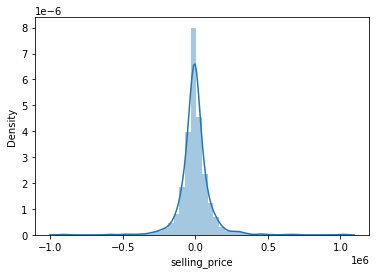

In [63]:
import seaborn as sns
sns.distplot(y_test-predictions)

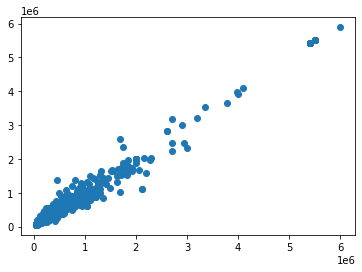

In [64]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [65]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)